In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target

(569, 30)


In [2]:
breast_input = pd.DataFrame(X)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
labels = np.reshape(Y,(569,1))
final_breast_data = np.concatenate([X,labels], axis = 1)
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(breast_input, Y, train_size=0.8, test_size=0.2, random_state = 0)

In [5]:
#Now we’ll do feature scaling to scale our data between 0 and 1 to get better
sc_X1 = StandardScaler()
X_train = sc_X1.fit_transform(X_train)
X_test = sc_X1.transform(X_test)

In [6]:
#logistic regression
classifier = LogisticRegression(random_state=0, penalty = "none")
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none', random_state=0)

In [7]:
Y_pred = classifier.predict(X_test)

In [8]:
#confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[45,  2],
       [ 3, 64]])

In [9]:
#matrix
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.956140350877193
Precision: 0.9696969696969697
Recall: 0.9552238805970149


Text(0.5, 427.9555555555555, 'Predicted label')

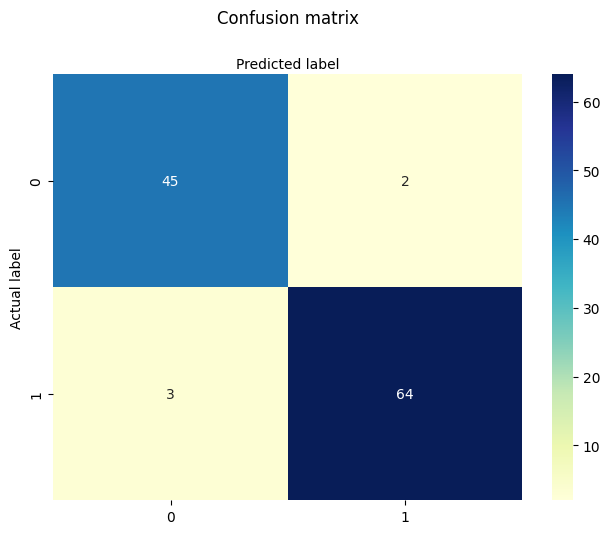

In [10]:
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [11]:
# Ques 1 (ii) With penalty
classifier = LogisticRegression(random_state=0, penalty='l2')
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [12]:
#confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[45,  2],
       [ 2, 65]])

In [13]:
#printing 3 matrices
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433


Text(0.5, 427.9555555555555, 'Predicted label')

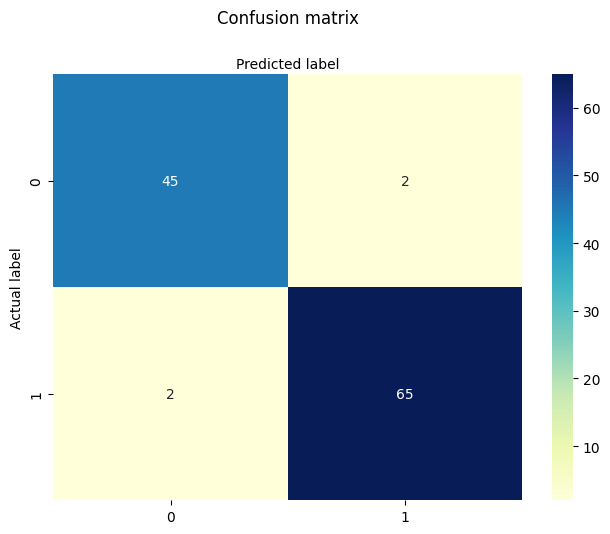

In [14]:
import seaborn as sns
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [46]:
# Ques 2, Naive Baesian
# random state =60 gives highest accuracy, =0 gives lowest, =80 gives lower than =60
X_train, X_test, Y_train, Y_test = train_test_split(breast_input, Y, train_size=0.8, test_size=0.2, random_state = 0)

In [47]:
#Now we’ll do feature scaling to scale our data between 0 and 1 to get better
sc_X1 = StandardScaler()
X_train = sc_X1.fit_transform(X_train)
X_test = sc_X1.transform(X_test)

In [48]:
model=GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [49]:
yTest = Y_test
pred = model.predict(X_test)
print(metrics.classification_report(yTest,pred))
print(metrics.confusion_matrix(yTest,pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        47
           1       0.92      0.91      0.92        67

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114

[[42  5]
 [ 6 61]]


Text(0.5, 427.9555555555555, 'Predicted label')

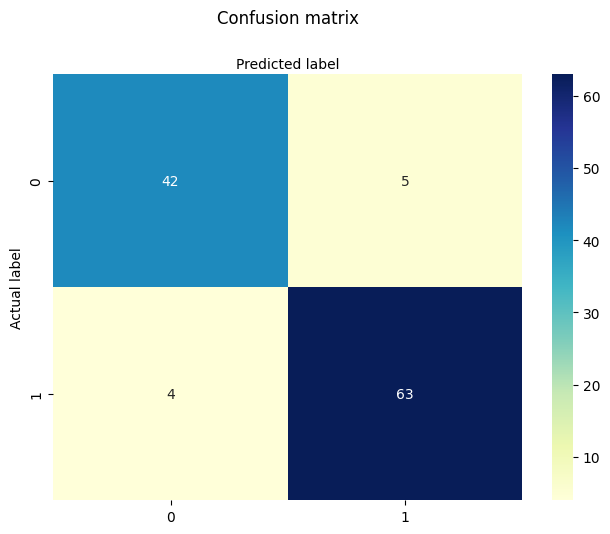

In [39]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
cnf_matrix = confusion_matrix(yTest,pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [40]:
# print all 3
print("Accuracy:",metrics.accuracy_score(yTest, pred))
print("Precision:",metrics.precision_score(yTest, pred))
print("Recall:",metrics.recall_score(yTest, pred))

Accuracy: 0.9210526315789473
Precision: 0.9264705882352942
Recall: 0.9402985074626866


In [21]:
#Ques 3
# pca = PCA(n_components=8)
# principalComponents = pca.fit_transform(breast_data)
# principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2','PC 3','PC 4' , 'PC 5','PC 6' ,'PC 7' ,'PC 8' ])

In [22]:
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2','PC 3' ,'PC 4' , 'PC 5','PC 6' ,'PC 7' ,'PC 8' ,'PC 9' ,'PC 10', 'PC 11'])
# n=11 gives the best accuracy

In [23]:
# pca = PCA(n_components=12)
# principalComponents = pca.fit_transform(breast_data)
# principalDf = pd.DataFrame(data = principalComponents
# , columns = ['PC 1', 'PC 2','PC 3' ,'PC 4' , 'PC 5','PC 6' ,'PC 7' ,'PC 8' ,'PC 9' ,'PC10' ,'PC 11' ,'PC 12' ])
# pca = PCA(n_components=20)
# principalComponents = pca.fit_transform(breast_data)
# principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2','PC 3','PC 4' , 'PC 5','PC 6' ,'PC 7' ,'PC 8' ,'PC 9' ,'PC 10' ,'PC 11' ,'PC 12' , 'PC 13', 'PC14', 'PC 15', 'PC 16', 'PC 17', 'PC 18', 'PC 19', 'PC 20']

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, test_size = 0.2, random_state=0)

In [25]:
# scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# logistic regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [26]:
Y_pred = classifier.predict(X_test)

In [27]:
# confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[45,  2],
       [ 2, 65]])

In [28]:
# print all 3
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433


Text(0.5, 427.9555555555555, 'Predicted label')

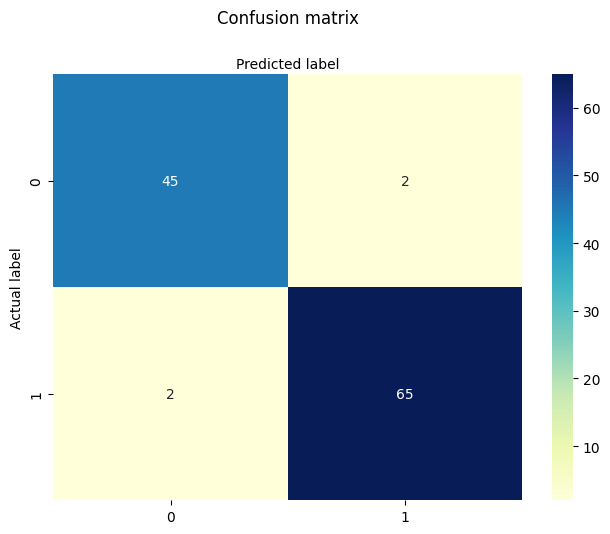

In [29]:
# plotting cnf
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [54]:
# Ques 4
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2','PC 3' ,
'PC 4' , 'PC 5','PC 6' ,'PC 7' ,'PC 8' ])

In [55]:
# pca = PCA(n_components=11)
# principalComponents = pca.fit_transform(breast_data)
# principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2','PC 3','PC 4' , 'PC 5','PC 6' ,'PC 7' ,'PC 8' ,'PC 9' ,'PC 10' ,'PC 11'])
# # n=11 gives the best accuracy

In [56]:
# pca = PCA(n_components=20)
# principalComponents = pca.fit_transform(breast_data)
# principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2','PC 3','PC 4' , 'PC 5','PC 6' ,'PC 7' ,'PC 8' ,'PC 9' ,'PC 10' ,'PC 11' ,'PC 12' , 'PC 13', 'PC14', 'PC 15', 'PC 16', 'PC 17', 'PC 18', 'PC 19', 'PC 20'])

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y, test_size = 0.2, random_state=0)

In [58]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [59]:
model=GaussianNB()
model.fit(X_train,Y_train)
print(model)

GaussianNB()


In [60]:
yTest = Y_test
pred = model.predict(X_test)
print(metrics.classification_report(yTest,pred))
print(metrics.confusion_matrix(yTest,pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        47
           1       0.93      0.94      0.93        67

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

[[42  5]
 [ 4 63]]


Text(0.5, 427.9555555555555, 'Predicted label')

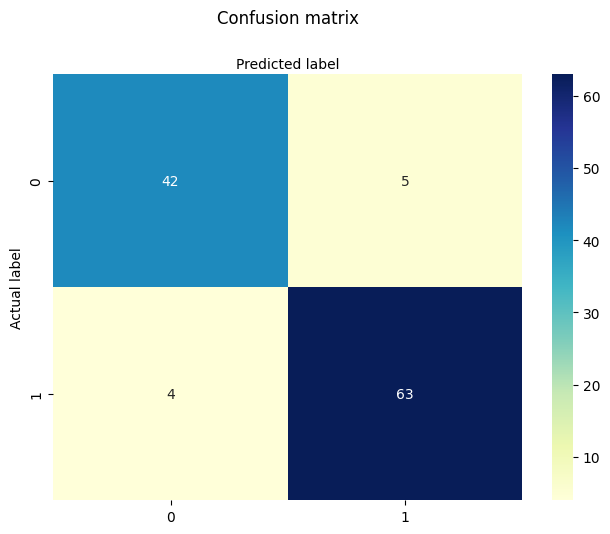

In [41]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
cnf_matrix = confusion_matrix(yTest,pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [42]:
# print all 3
print("Accuracy:",metrics.accuracy_score(yTest, pred))
print("Precision:",metrics.precision_score(yTest, pred))
print("Recall:",metrics.recall_score(yTest, pred))

Accuracy: 0.9210526315789473
Precision: 0.9264705882352942
Recall: 0.9402985074626866
